In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

In [129]:
# toy model with a constant drive amplitude

lambda_t = np.sqrt(2) # ratio between the drive matrix elements for the 1 <-> 2 and 0 <-> 1 transitions
alpha = -300.0 #MHz
epsilon_x = 1.0 #MHz (gives a 50 ns 2pi pulse)

In [104]:
time = 0.5/epsilon_x # us 


H = np.array([[alpha, lambda_t*epsilon_x/2., 0],
            [lambda_t*epsilon_x/2., 0, epsilon_x/2.],
             [0, epsilon_x/2., 0]])

U = expm(-2*np.pi*1j*H*time)

ZeroDivisionError: float division by zero

In [91]:
np.round(U, 3)

array([[ 1.000+0.026j, -0.012-0.j   , -0.000-0.012j],
       [-0.012-0.j   ,  0.000-0.008j, -0.013-1.j   ],
       [-0.000-0.012j, -0.013-1.j   ,  0.000+0.008j]])

In [92]:
stark_shift_num = np.angle(U[0,0]) #numerical
stark_shift_an = 2*np.pi* ((lambda_t*lambda_t + 2)/(4*alpha)*epsilon_x*epsilon_x + alpha) * time

In [93]:
np.mod(stark_shift_an, 2*np.pi)

6.2308254296197632

In [94]:
stark_shift_num

0.026179276631154824

In [130]:
state_2_phases = []
times = np.linspace(0,0.001,10) #us
for time in times:
    H = np.array([[alpha, lambda_t*epsilon_x/2., 0],
            [lambda_t*epsilon_x/2., 0, epsilon_x/2.],
             [0, epsilon_x/2., 0]])

    U = expm(-2*np.pi*1j*H*time)
    state_2_phases.append(np.angle(U[0,0]))

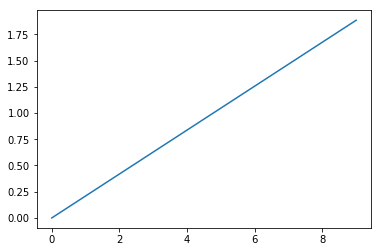

In [131]:
plt.plot(state_2_phases)

In [132]:
m,b = np.polyfit(times, state_2_phases, deg = 1 )

In [133]:
#Stark shift in MHz
m/(2*np.pi) + alpha

0.00078806667937669772

In [138]:
((lambda_t**2 + 2)/(4*alpha)*epsilon_x**2)

-0.0033333333333333335

In [128]:
np.round(U, 3)

array([[-0.309+0.95j ,  0.031-0.022j, -0.001-0.j   ],
       [ 0.031-0.022j,  0.999-0.001j, -0.000-0.031j],
       [-0.001-0.j   , -0.000-0.031j,  1.000+0.j   ]])